# All necessary Libraries

In [1]:
import pandas as pd  # Pandas_for_data_manipulation_and_analysis
import numpy as np  # NumPy_for_numerical_computing
import matplotlib.pyplot as plt  # Matplotlib_for_data_visualization
import seaborn as sns  # Seaborn_for_statistical_data_visualization
from sklearn.ensemble import RandomForestRegressor  # Random_Forest_regressor_from_Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error  # Metrics_for_model_evaluation
from sklearn.model_selection import train_test_split, GridSearchCV  # For_splitting_dataset_and grid_search
import lightgbm as lgb  # LightGBM_for_gradient_boosting_framework
from sklearn.svm import SVR, SVC  # Support_Vector_Regressor_and_Classifier_from_Scikit-learn
from sklearn.preprocessing import StandardScaler  # For_standardizing_features
import tensorflow as tf  # TensorFlow_for_machine_learning_tasks
from sklearn.datasets import make_classification  # To_create_synthetic_classification_datasets
from sklearn.preprocessing import LabelEncoder  # For_encoding_categorical_variables
import missingno as msno  # Missingno_for_visualizing_missing_data
from scipy.stats import shapiro  # Shapiro-Wilk_test_for_normality
from sklearn.impute import SimpleImputer  # For_imputing_missing_values
import squarify as sq  # Squarify_for_treemap_visualization
from mpl_toolkits.mplot3d import Axes3D #for_3D_Visuals

# LOADING_DATASET(AIRBNB_USA)

In [2]:
#Loading_AIRBNB_USA_CSV
Usa_Airbnb_dataset = pd.read_csv("USA_AirBnB.csv")


In [3]:
#defining_head_of_dataSet
Usa_Airbnb_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595.0,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,6/21/2022,0.29,3,339,0,NaN
1,5121.0,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,12/2/2019,0.28,2,88,0,NaN
2,6848.0,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,8/14/2023,1.08,1,142,4,NaN
3,6872.0,Condo in New York · 1 bedroom · 1 bed · 1 shar...,16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65,30,1,6/5/2022,0.05,2,359,0,NaN
4,6990.0,Rental unit in New York · ★4.88 · 1 bedroom · ...,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,70,30,246,8/14/2023,1.43,1,93,4,NaN


In [4]:
#defining_tail_of_dataSet
Usa_Airbnb_dataset.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
39622,1.037780e+18,Rental unit in New York · ★New · 1 bedroom · 2...,5735865,Jane,Manhattan,Upper West Side,40.801029,-73.961983,Entire home/apt,350,1,0,NaN,NaN,26,253,0,Exempt
39623,1.037820e+18,Home in Queens · ★New · 1 bedroom · 1 bed · 1 ...,541476403,Leela,Queens,Richmond Hill,40.693991,-73.824143,Private room,94,30,0,NaN,NaN,2,90,0,NaN
39624,1.037900e+18,Rental unit in New York · ★New · 1 bedroom · 1...,45905791,Melissa,Manhattan,West Village,40.738127,-74.001732,Entire home/apt,100,40,0,NaN,NaN,1,365,0,NaN
39625,1.037980e+18,Rental unit in New York · ★New · 1 bedroom · 1...,386008696,Ognen,Manhattan,Financial District,40.710610,-74.008471,Entire home/apt,600,7,0,NaN,NaN,1,41,0,Exempt
39626,1.037980e+18,Rental unit in New York · ★New · 1 bedroom · 1...,196579416,Julia,Manhattan,Midtown,40.759771,-73.964146,Entire home/apt,132,30,0,NaN,NaN,1,270,0,NaN


# Summary of dataset(AIRBNB_USA)

In [5]:
#Discription_AIRBNB_USA_dataset
print(Usa_Airbnb_dataset.describe())

                 id       host_id      latitude     longitude         price  \
count  3.962700e+04  3.962700e+04  39627.000000  39627.000000  39627.000000   
mean   3.083451e+17  1.602573e+08     40.729360    -73.946072    208.816464   
std    4.050888e+17  1.717839e+08      0.056425      0.054788    482.380712   
min    2.595000e+03  1.678000e+03     40.500314    -74.251907      8.000000   
25%    2.023932e+07  1.692691e+07     40.688980    -73.982785     75.000000   
50%    4.650264e+07  8.066903e+07     40.726520    -73.954090    127.000000   
75%    7.564325e+17  2.857275e+08     40.762667    -73.926560    214.000000   
max    1.037980e+18  5.491316e+08     40.911380    -73.713650  30000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    39627.000000       39627.000000       28147.000000   
mean        30.051127          25.251520           1.021708   
std         29.290027          57.718207           1.716199   
min          1.000000           0.00

# Number of rows selected for modelling

In [6]:
#sampling
AirBnb_sample = Usa_Airbnb_dataset.sample(n=11000, random_state=42)

# DataSet Information

In [7]:
#Information_of_dataSet
AirBnb_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11000 entries, 35337 to 32451
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11000 non-null  float64
 1   name                            11000 non-null  object 
 2   host_id                         11000 non-null  int64  
 3   host_name                       10995 non-null  object 
 4   neighbourhood_group             11000 non-null  object 
 5   neighbourhood                   11000 non-null  object 
 6   latitude                        11000 non-null  float64
 7   longitude                       11000 non-null  float64
 8   room_type                       11000 non-null  object 
 9   price                           11000 non-null  int64  
 10  minimum_nights                  11000 non-null  int64  
 11  number_of_reviews               11000 non-null  int64  
 12  last_review                     7

# DATASET_SHAPE

In [8]:
# Check_the_shape_of_the_original_dataset
print("Actual_dataset_Shape:", Usa_Airbnb_dataset.shape)
# Check_the_shape_of_the_reduced_dataset
print("Reduced_dataset_shape:", AirBnb_sample.shape)

Actual_dataset_Shape: (39627, 18)
Reduced_dataset_shape: (11000, 18)


# "Data perprocessing: Data cleaning "
####        1.Removing Unnecessary Columns
####        2.Checking Null values
####        3.Removing Duplic
####        4.Encoding Categoral Values to Numeric

In [9]:
#removing_unnecessary_Colunms
drop_columns=AirBnb_sample.drop(['id','name','host_id',
                                      'host_name','neighbourhood_group',
                                      'neighbourhood','last_review',
                                      'license',"reviews_per_month"],axis=1, inplace=True)

In [10]:
print(AirBnb_sample.head())


        latitude  longitude        room_type  price  minimum_nights  \
35337  40.795660 -73.970462  Entire home/apt    250              30   
13424  40.749450 -73.895610     Private room     42              30   
32354  40.739073 -73.962592  Entire home/apt    300              30   
8982   40.764110 -73.993710  Entire home/apt    170              30   
198    40.674970 -73.977960      Shared room    325              30   

       number_of_reviews  calculated_host_listings_count  availability_365  \
35337                  0                               1               352   
13424                  1                             266                35   
32354                  4                               1               179   
8982                   5                             139               334   
198                   42                               1                93   

       number_of_reviews_ltm  
35337                      0  
13424                      0  
32354      

# Checking_Null_values and dropping null values

In [11]:
# Check_for_missing_values
print(AirBnb_sample.isnull().sum())

latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


# Dropping Duplicate Rows

In [12]:
# Number_of_repeated_rows
repeated_rows =AirBnb_sample[AirBnb_sample.duplicated()]
print(f'Number of repeated rows: {len(repeated_rows)}')
# Droping_repeated_rows
AirBnb_sample = AirBnb_sample.drop_duplicates()

Number of repeated rows: 15


In [13]:
# Shuffle_the_house_data_cleaned
AirBnb_cleaned =AirBnb_sample.sample(frac=1, random_state=42)  

# After_selecting,_confirm_how_many_rows_there_are_in_the_AirBnb_cleaned_data.
print("Number_of_rows_after_selection:", len(AirBnb_cleaned))

Number_of_rows_after_selection: 10985



# Encoding Categoral Values to Numeric

In [14]:
#assigning_variable_to_label_Encoder_function 
label_encoder = LabelEncoder()

In [15]:
#converting_categorial_values_into_numerical_values
AirBnb_cleaned['room_type_encoded'] = label_encoder.fit_transform(AirBnb_cleaned['room_type'])
AirBnb_cleaned.drop(columns=['room_type'], inplace=True)
AirBnb_cleaned

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_encoded
30324,40.74693,-73.98681,118,1,0,131,359,0,2
35127,40.73253,-73.98988,271,30,0,165,345,0,0
5874,40.71091,-73.95754,65,30,0,1,0,0,2
6985,40.70804,-73.94380,60,30,6,1,0,0,2
10500,40.68422,-73.93832,50,30,85,4,0,11,2
...,...,...,...,...,...,...,...,...,...
21220,40.70608,-73.74721,169,30,1,1,365,1,2
11858,40.58542,-73.81791,53,30,103,2,179,9,2
7154,40.80570,-73.94625,397,30,95,3,241,3,0
28932,40.85865,-73.90355,52,30,14,4,363,2,2


# Data Visualization

## Heat Map

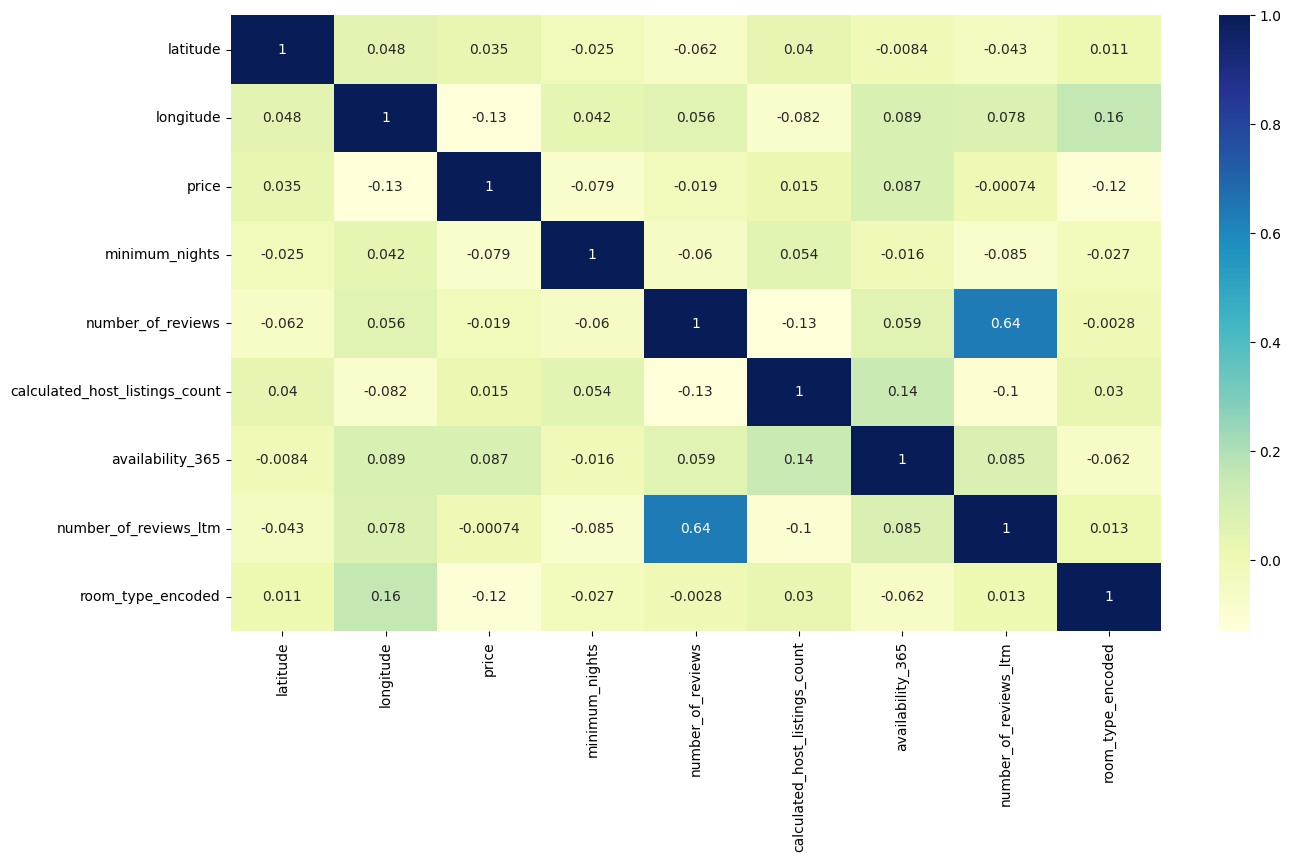

In [16]:
#heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(AirBnb_cleaned.corr(), annot=True, cmap="YlGnBu")
plt.show()

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>,
        <Axes: title={'center': 'room_type_encoded'}>]], dtype=object)

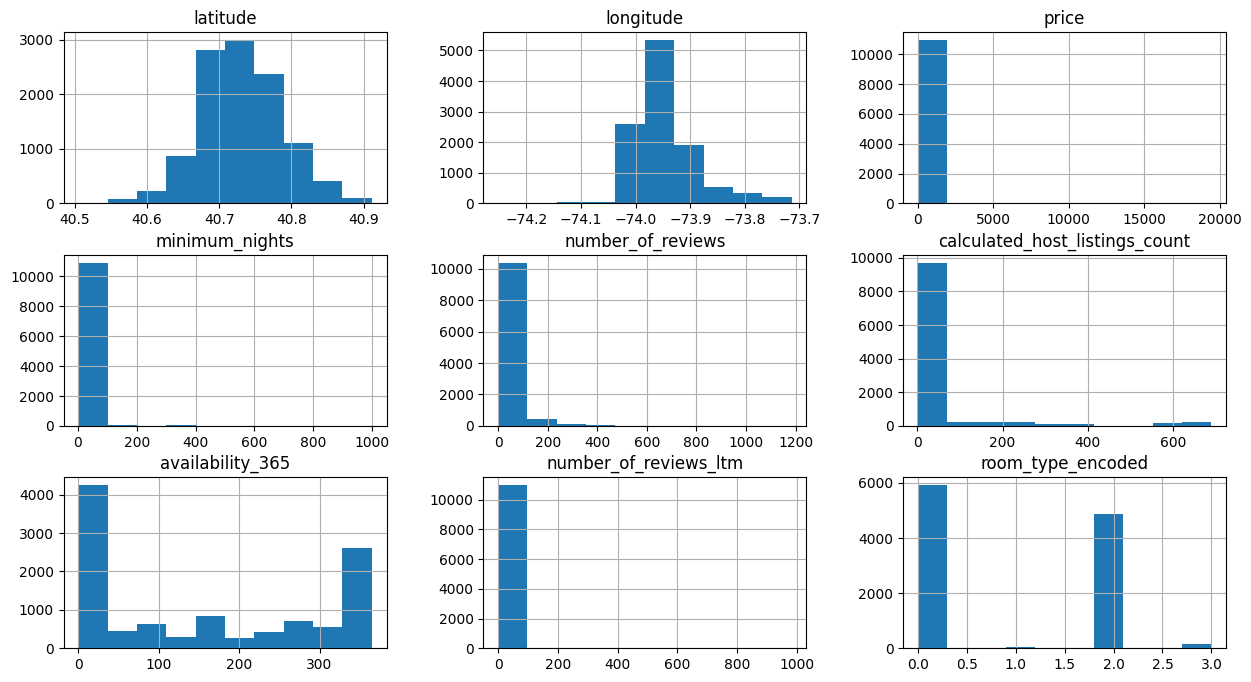

In [17]:
#Histogram_of_each_attributes
AirBnb_cleaned.hist(figsize=(15, 8))

In [18]:
#by_using_log_function_our_skewed_data_converted_into_proper_shape
AirBnb_cleaned ["minimum_nights"] = np.log(AirBnb_cleaned ["minimum_nights"] + 1)
AirBnb_cleaned ["number_of_reviews"] = np.log(AirBnb_cleaned ["number_of_reviews"] + 1)
AirBnb_cleaned ["number_of_reviews_ltm"] = np.log(AirBnb_cleaned ["number_of_reviews_ltm"] + 1)
AirBnb_cleaned ["calculated_host_listings_count"] = np.log(AirBnb_cleaned ["calculated_host_listings_count"] + 1)
AirBnb_cleaned ["price"] = np.log(AirBnb_cleaned ["price"] + 1)

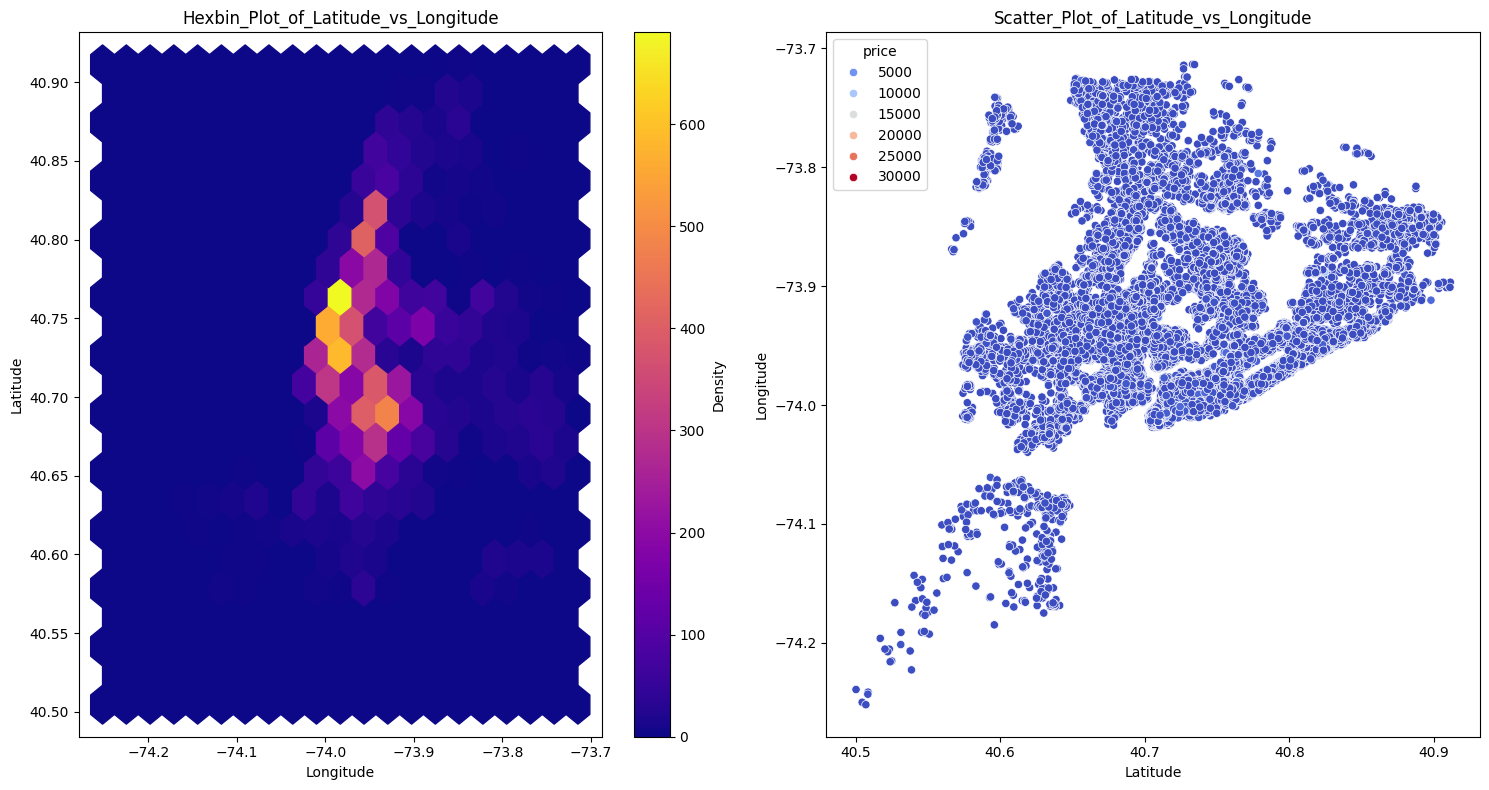

In [19]:
#Scatter_Plot_and_Hexbin_Plot


# Set_up_subplots
plt.figure(figsize=(15, 8))

# Hexbin_plot
plt.subplot(1, 2, 1)
plt.hexbin(AirBnb_cleaned['longitude'], AirBnb_cleaned['latitude'], gridsize=20, cmap='plasma')
plt.colorbar(label='Density')
plt.title('Hexbin_Plot_of_Latitude_vs_Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Scatter_plot
plt.subplot(1, 2, 2)
sns.scatterplot(x="latitude", y="longitude", data=Usa_Airbnb_dataset, hue="price", palette="coolwarm")
plt.title('Scatter_Plot_of_Latitude_vs_Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.tight_layout()
plt.show()


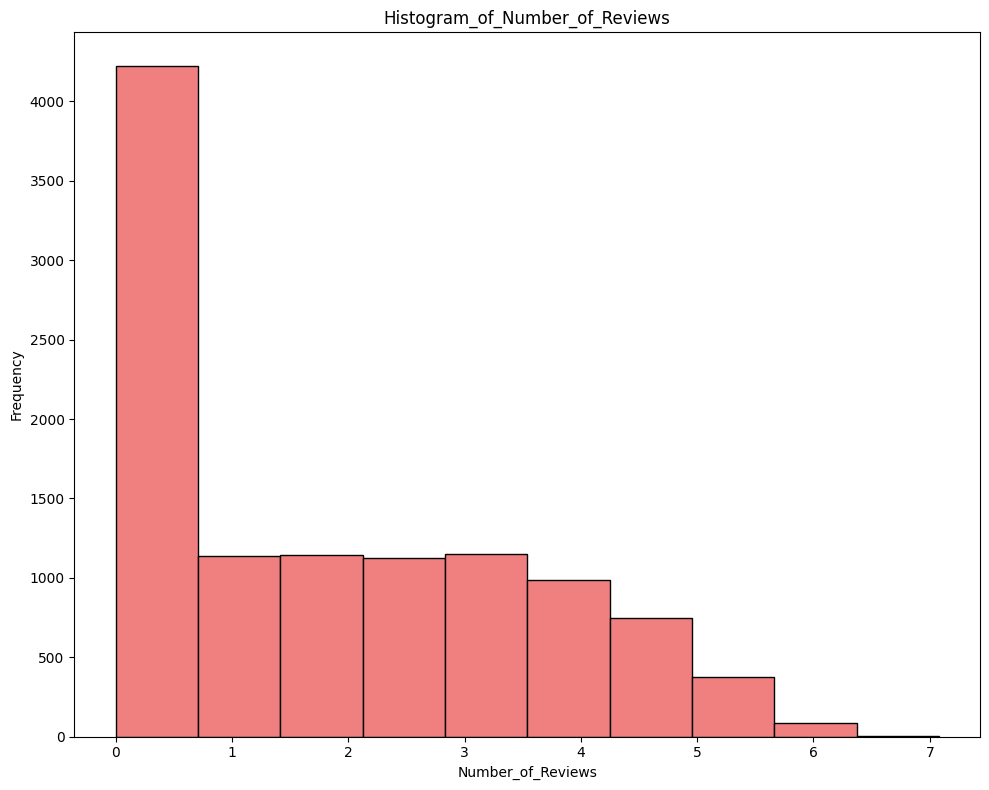

In [20]:
#Number_of_Reviews
plt.figure(figsize=(10, 8))


plt.hist(AirBnb_cleaned['number_of_reviews'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Histogram_of_Number_of_Reviews')
plt.xlabel('Number_of_Reviews')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

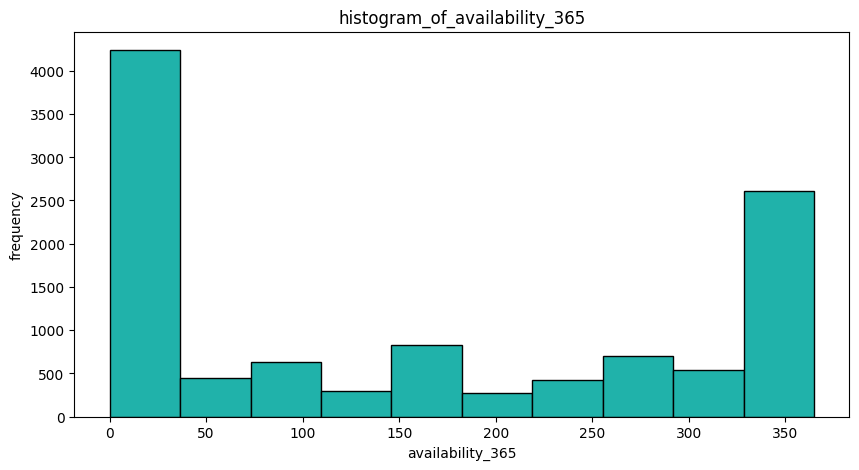

In [21]:
# Availability_365
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
plt.hist(AirBnb_cleaned['availability_365'], bins=10, color='lightseagreen', edgecolor='black')
plt.title('histogram_of_availability_365')
plt.xlabel('availability_365')
plt.ylabel('frequency')
plt.show()


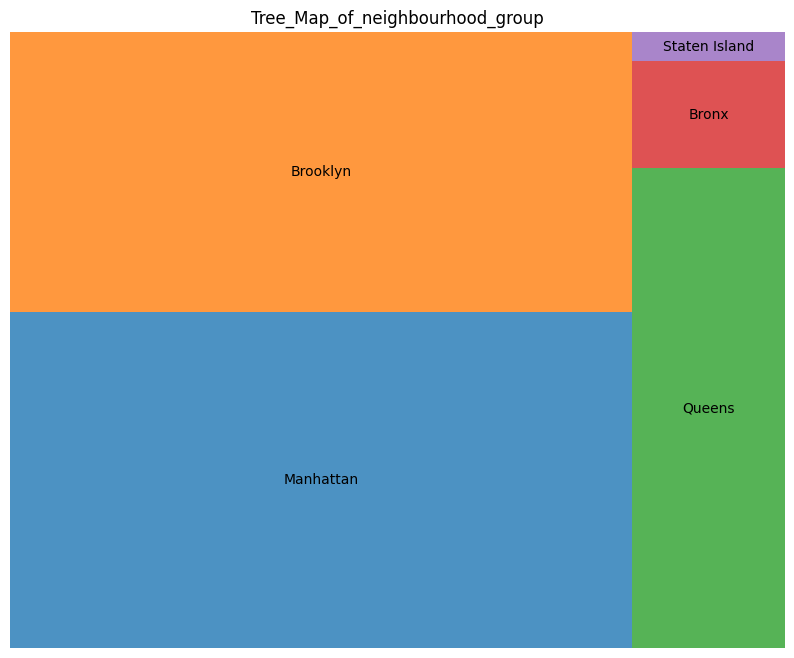

In [22]:
# Data_for_the_bar_plot
neighbourhood_group_counts = Usa_Airbnb_dataset['neighbourhood_group'].value_counts()

# Data_for_the_tree_map
Threshold = 40
Counts_below_Threshold = neighbourhood_group_counts[neighbourhood_group_counts < Threshold]
Other_count = Counts_below_Threshold.sum()
Combined_counts = neighbourhood_group_counts.copy()
Combined_counts.loc[Combined_counts < Threshold] = Other_count
labels = Combined_counts.index
sizes = Combined_counts.values
colors = plt.cm.tab10(range(len(labels)))

# tree_map
plt.figure(figsize=(10, 8))
sq.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('Tree_Map_of_neighbourhood_group')
plt.axis('off')
plt.show()

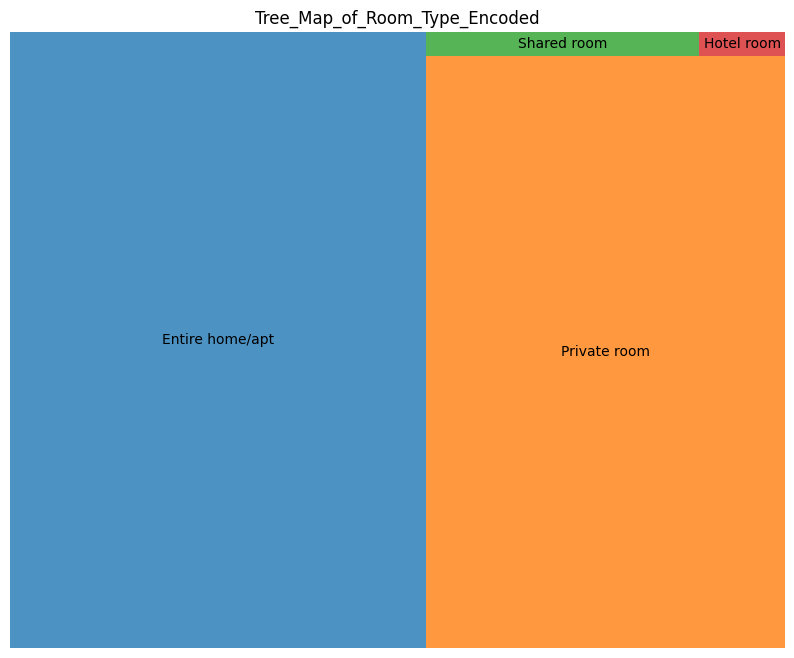

In [23]:
# Data_for_the_bar_plot
room_type_encoded_counts = Usa_Airbnb_dataset['room_type'].value_counts()

# Data_for_the_tree_map
Threshold = 40
Counts_below_threshold = room_type_encoded_counts[room_type_encoded_counts < Threshold]
Other_count = Counts_below_threshold.sum()
Combined_counts = room_type_encoded_counts.copy()
Combined_counts.loc[Combined_counts < Threshold] = Other_count
labels = Combined_counts.index
sizes = Combined_counts.values
colors = plt.cm.tab10(range(len(labels)))

# Tree_map
plt.figure(figsize=(10, 8))
sq.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('Tree_Map_of_Room_Type_Encoded')
plt.axis('off')
plt.show()

C:\Users\walee\AppData\Local\Temp\ipykernel_23144\429498021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='room_type_encoded', data=AirBnb_cleaned, palette='husl')


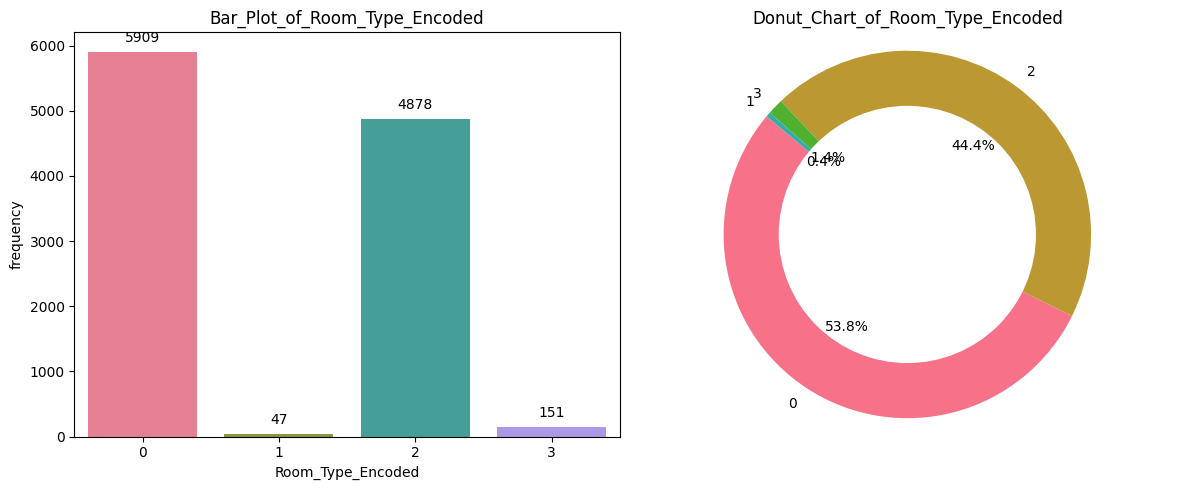

In [24]:
plt.figure(figsize=(12, 5))
#Room_Type_Encoded_bar_plot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='room_type_encoded', data=AirBnb_cleaned, palette='husl')

plt.title('Bar_Plot_of_Room_Type_Encoded')
plt.xlabel('Room_Type_Encoded')
plt.ylabel('frequency')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


# Room_type_encoded_Donut_Chartb
plt.subplot(1, 2, 2)
sizes = AirBnb_cleaned['room_type_encoded'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('husl'))
plt.axis('equal')
plt.title('Donut_Chart_of_Room_Type_Encoded')
# Draw_a_white_circle_at_the_center_to_make_it_look_like_a_donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()


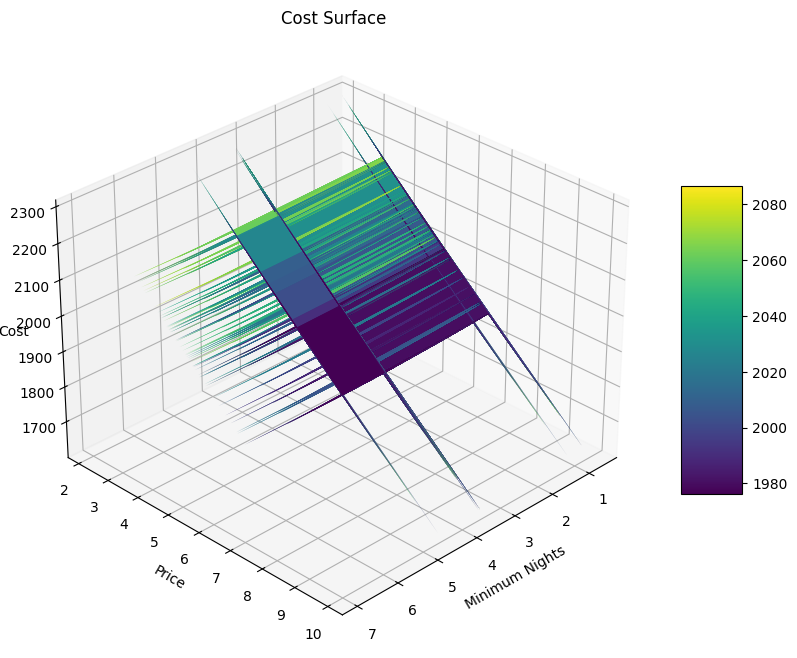

In [25]:
# Load_dataset
minimum_nights = AirBnb_cleaned['minimum_nights'].values
price = AirBnb_cleaned['price'].values
minimum_nights_grid, price_grid = np.meshgrid(minimum_nights, price)
# cost_function
cost = (minimum_nights_grid - 5)**2 + (price_grid - 50)**2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(minimum_nights_grid, price_grid, cost, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('Minimum Nights')
ax.set_ylabel('Price')
ax.set_zlabel('Cost')
ax.zaxis.labelpad = -1 
ax.set_title('Cost Surface')
ax.view_init(elev=30, azim=45)
plt.show()

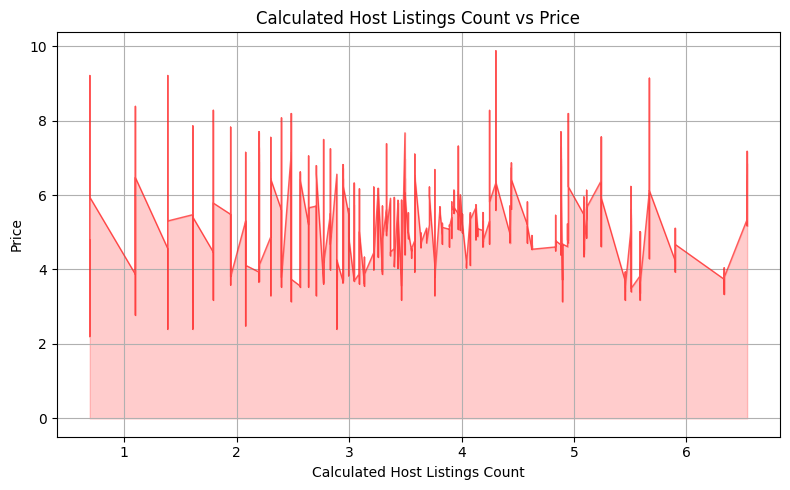

In [26]:
# Sort the DataFrame by calculated_host_listings_count for a smoother area plot
AirBnb_sorted = AirBnb_cleaned.sort_values(by='calculated_host_listings_count')

# Plot an area plot
plt.figure(figsize=(8, 5))
plt.fill_between(AirBnb_sorted['calculated_host_listings_count'], AirBnb_sorted['price'], color='red', alpha=0.2)
plt.plot(AirBnb_sorted['calculated_host_listings_count'], AirBnb_sorted['price'], color='red', linewidth=1, alpha=0.6)
plt.title('Calculated Host Listings Count vs Price')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\walee\AppData\Local\Temp\ipykernel_23144\1650218647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='price', y='host_name', data=Usa_Airbnb_dataset_top_hosts, palette=colors)


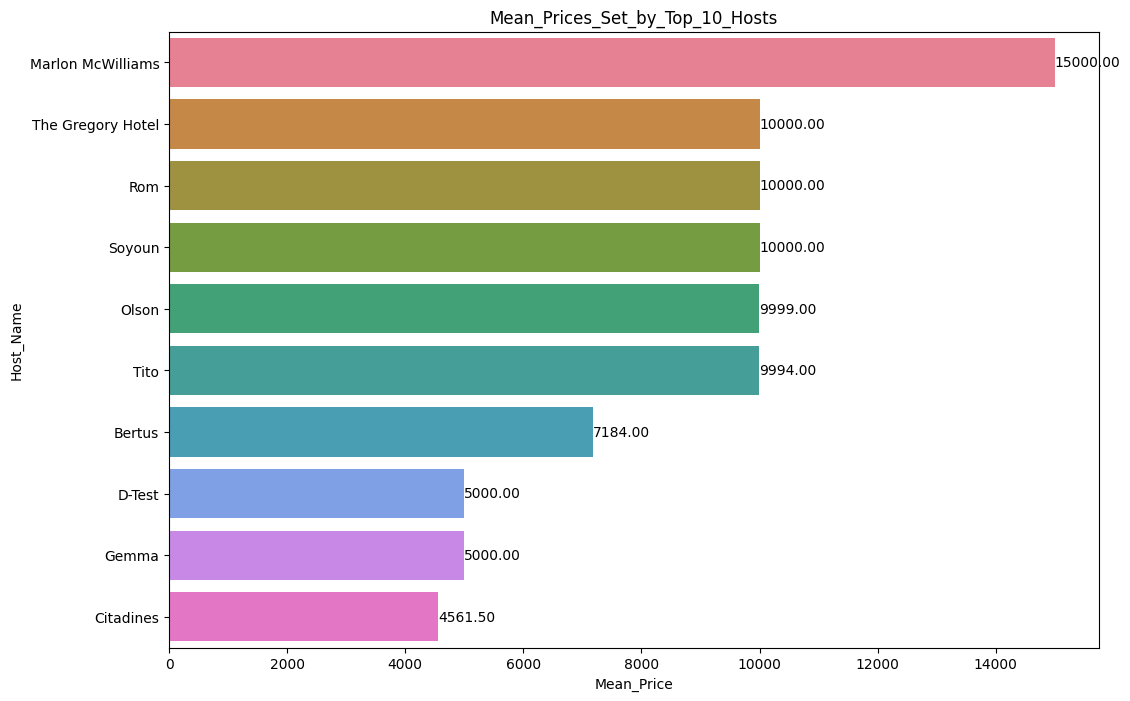

In [27]:
#Horizontal_bar_graph_of_Mean_Prices_Set_by_Top_10_Hosts
Usa_Airbnb_dataset_top_hosts = Usa_Airbnb_dataset.groupby(['host_name'])['price'].mean().reset_index()
Usa_Airbnb_dataset_top_hosts = Usa_Airbnb_dataset_top_hosts.sort_values('price', ascending=False).head(10)
colors = sns.color_palette("husl", 10)
plt.figure(figsize=(12,8))
bars = sns.barplot(x='price', y='host_name', data=Usa_Airbnb_dataset_top_hosts, palette=colors)
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')
plt.title('Mean_Prices_Set_by_Top_10_Hosts')
plt.xlabel('Mean_Price')
plt.ylabel('Host_Name')
plt.show()

C:\Users\walee\AppData\Local\Temp\ipykernel_23144\2015509041.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='host_name', y='reviews_per_month', data=Usa_Airbnb_dataset_top_hosts, palette=colors)


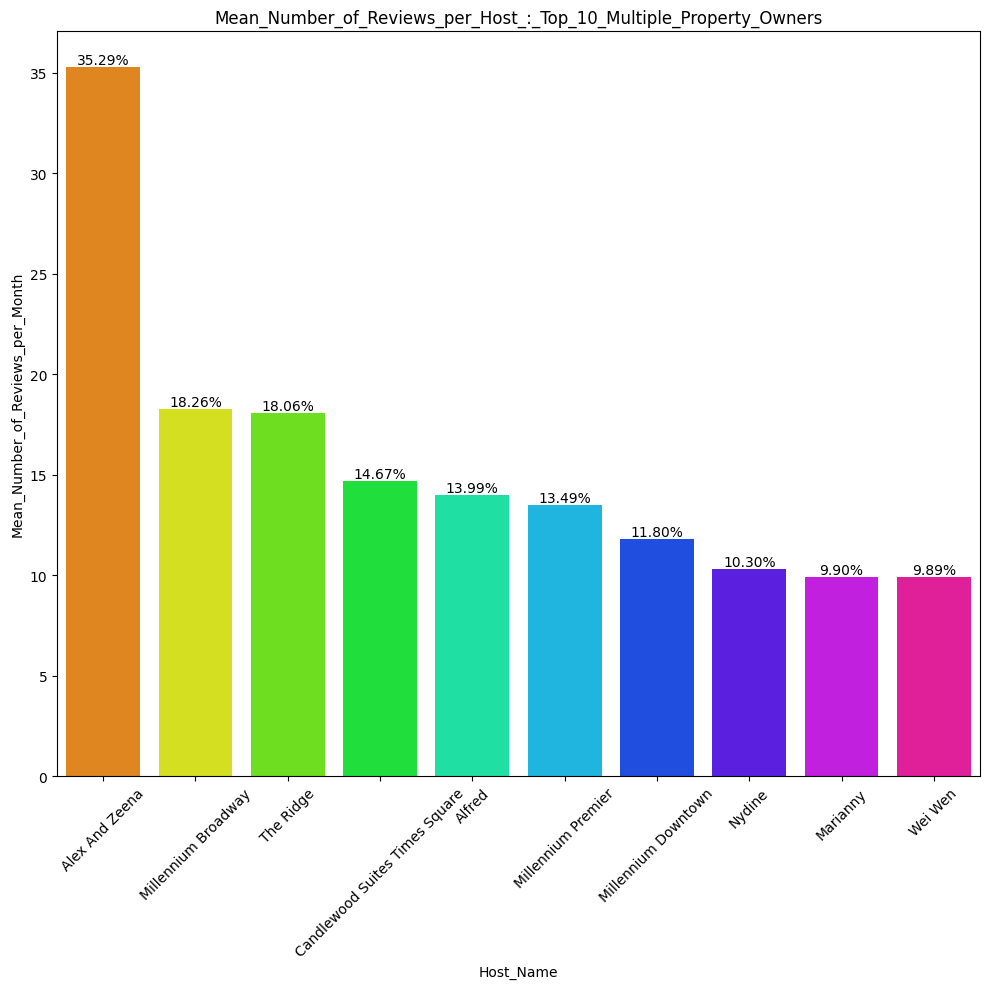

In [28]:
#Vertical_bar_graph_of_Mean_Number_of_Reviews_per_Host:_Top_10_Multiple_Property_Owners 
Usa_Airbnb_dataset_top_hosts = Usa_Airbnb_dataset.groupby(['host_name'])['reviews_per_month'].mean().reset_index()
Usa_Airbnb_dataset_top_hosts = Usa_Airbnb_dataset_top_hosts.sort_values('reviews_per_month', ascending=False).head(10)
num_bars = len(Usa_Airbnb_dataset_top_hosts)
colors = sns.color_palette('hsv', num_bars)
plt.figure(figsize=(10, 10))
bars = sns.barplot(x='host_name', y='reviews_per_month', data=Usa_Airbnb_dataset_top_hosts, palette=colors)
for bar, color in zip(bars.patches, colors):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')
plt.title('Mean_Number_of_Reviews_per_Host_:_Top_10_Multiple_Property_Owners')
plt.xlabel('Host_Name')
plt.ylabel('Mean_Number_of_Reviews_per_Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Removing Outliers

In [29]:
#Removing_Outliers


# Calculate_the_z-scores_for_each_column
z_scores = (AirBnb_cleaned - AirBnb_cleaned.mean()) / AirBnb_cleaned.std()

# Define_a_threshold_for_outlier_detection
threshold = 3  # adjust_this_threshold_according_to_our_dataset

# Create_a_DataFrame_to_store_outliers
outliers = pd.DataFrame()

# Iterate_over_each_column_and_remove_outliers
for column in AirBnb_cleaned.columns:
    outliers[column] = AirBnb_cleaned[abs(z_scores[column]) > threshold][column]
    AirBnb_cleaned = AirBnb_cleaned[abs(z_scores[column]) <= threshold]

# Print_the_removed_outliers
print("Removed_outliers:")
print(outliers)

# Print_the_shape_of_the_updated_DataFrame
print("Shape of the updated DataFrame:", AirBnb_cleaned.shape)

Removed_outliers:
        latitude  longitude  price  minimum_nights  number_of_reviews  \
26474  40.507114        NaN    NaN             NaN                NaN   
23536  40.504560        NaN    NaN             NaN                NaN   
4660   40.546150        NaN    NaN             NaN                NaN   
16432  40.905050        NaN    NaN             NaN                NaN   
8777   40.538940        NaN    NaN             NaN                NaN   
32349  40.547509        NaN    NaN             NaN                NaN   
27324  40.546247        NaN    NaN             NaN                NaN   
26222  40.524980        NaN    NaN             NaN                NaN   
31360  40.548383        NaN    NaN             NaN                NaN   
26679  40.902951        NaN    NaN             NaN                NaN   
21475  40.911380        NaN    NaN             NaN                NaN   
20720  40.531380        NaN    NaN             NaN                NaN   
32967  40.538661        NaN    Na

C:\Users\walee\AppData\Local\Temp\ipykernel_23144\364104330.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers[column] = AirBnb_cleaned[abs(z_scores[column]) > threshold][column]
C:\Users\walee\AppData\Local\Temp\ipykernel_23144\364104330.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  AirBnb_cleaned = AirBnb_cleaned[abs(z_scores[column]) <= threshold]
C:\Users\walee\AppData\Local\Temp\ipykernel_23144\364104330.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers[column] = AirBnb_cleaned[abs(z_scores[column]) > threshold][column]
C:\Users\walee\AppData\Local\Temp\ipykernel_23144\364104330.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  AirBnb_cleaned = AirBnb_cleaned[abs(z_scores[column]) <= threshold]
C:\Users\walee\AppData\Local\Temp\ipykernel_23144\364104330.py:15: UserWarning: Boolean Series key will be reindexed to match Data

# Modeling

### 1. Random Forest using SK-LEARN
### (Visualization)
### 2.Random Forest Using LightGBM
### (Visualization)
### 3. Support Vector Regressor Using Scikit-Learn
### (Visualization)
### 4. Applying Support Vector Regressor using Tensor-Flow
### (Visualization)

# Random Forest Using Scikit-Learn

Random forest Regressor is a supervised learning algorithm which is used for continuous prediction. Random Forest Regressor consist of specific hyperparameters such as the number of trees, max depth and features to consider that are used in optimization which is also called hyperparameter turning. It can handle huge amounts of information like features or attributes to make a prediction.

In [30]:
# Assign_X_variable_and_y_variable
X = AirBnb_cleaned.drop('price', axis=1)
y = AirBnb_cleaned['price']

In [31]:
# Spliting_dataset_into_training_and_testing
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Set_the_Random_Forest_model_up_and_start_training_it.
random_forest_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=1)
random_forest_model.fit(X_training, y_training)

RandomForestRegressor(n_estimators=50, n_jobs=1, random_state=42)

In [33]:
# predictions_on_y_variable
y_predict = random_forest_model.predict(X_testing)

In [34]:
# Analyzing_the_model
mse = mean_squared_error(y_testing, y_predict)
r2 = r2_score(y_testing, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_testing, y_predict)

In [35]:
#outcomes
print(f'R-squared Score: {r2}')
print(f'Mean Squared Error:', mse)
print("Model Accuracy: {:.2f}%".format(r2))
print(f'Mean_Absolute_Error: ', mae)
print(f'Root_Mean_Squared_Error: ', rmse)

R-squared Score: 0.5636691661240978
Mean Squared Error: 0.24758103816083038
Model Accuracy: 0.56%
Mean_Absolute_Error:  0.36333639927075206
Root_Mean_Squared_Error:  0.4975751583035777


In [36]:
Error_USA_data = pd.DataFrame({
    'Actual Values': np.array(y_testing).round(),
    'Predicted Values': y_predict.round()
})
Error_USA_data.head(5)

,Actual Values,Predicted Values
0,4.0,4.0
1,5.0,4.0
2,7.0,5.0
3,7.0,5.0
4,4.0,4.0


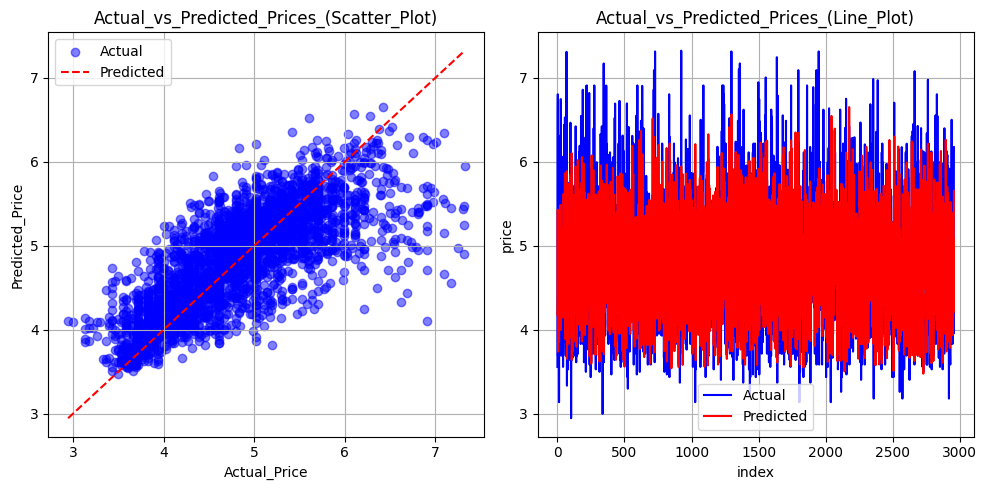

In [37]:


# Create_subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter_plot
axes[0].scatter(y_testing, y_predict, color='blue', label='Actual', alpha=0.5)
axes[0].plot([min(y_testing), max(y_testing)], [min(y_testing), max(y_testing)], color='red', linestyle='--', label='Predicted')
axes[0].set_xlabel('Actual_Price')
axes[0].set_ylabel('Predicted_Price')
axes[0].set_title('Actual_vs_Predicted_Prices_(Scatter_Plot)')
axes[0].legend()
axes[0].grid(True)

# Line_plot
axes[1].plot(y_testing.values, color='blue', label='Actual')
axes[1].plot(y_predict, color='red', label='Predicted')
axes[1].set_xlabel('index')
axes[1].set_ylabel('price')
axes[1].set_title('Actual_vs_Predicted_Prices_(Line_Plot)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Random Forest using lightgbm

LightGBM regressor is a fast and efficient algorithm for the prediction of continuous values for large datasets.By using gradient boosting, LightGBM accumulates many weak models into a strong predictor.It utilises categorical values directly without converting them into numerical values, also it doesn't need one-hot encoding or another preprocessing steps.

In [38]:
# Spliting_datasets_into_training_and_testing
train, test = train_test_split(AirBnb_cleaned, test_size=0.2, random_state=1234)

In [39]:
# specify_the_features_of_X_and_the_target_variable_y
X_training = train[["latitude", "longitude", "minimum_nights", "availability_365", "number_of_reviews", "calculated_host_listings_count", "room_type_encoded"]]
y_training = train["price"]
X_testing = test[["latitude", "longitude","minimum_nights", "availability_365", "number_of_reviews", "calculated_host_listings_count", "room_type_encoded"]]
y_testing = test["price"]

In [40]:
# Create_LightGBM_dataset
train_data = lgb.Dataset(X_training, label=y_training)

In [41]:
# Define_hyperparameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 30,  # Increase_num_leaves_for_more_complex_trees
    'learning_rate': 0.05,  # Decrease_learning_rate_for_smoother_convergence
    'feature_fraction': 0.8,  # Use_a_fraction_of_features_to_reduce_overfitting
    'bagging_fraction': 0.8,  # Use_a_fraction_of_data_to_reduce_overfitting
    'bagging_freq': 5,
    'verbose': 0,
    'lambda_l1': 0.1,  # L1_regularization
    'lambda_l2': 0.1,  # L2_regularization
}

In [42]:
# Train_the_LightGBM_model
num_round = 100
lgb_model = lgb.train(params, train_data, num_round)

In [43]:
# Make_predictions_on_the_test_set
y_predict = lgb_model.predict(X_testing)

In [44]:
# Evaluate_the_model's_performance
mse = mean_squared_error(y_testing, y_predict)

r_squared = r2_score(y_testing, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_testing, y_predict)


In [45]:
print("Mean_Squared_Error:", mse)
print("R-square:", r_squared)
print("Model Accuracy: {:.2f}%".format(r_squared*100))
print(f'Mean_Absolute_Error: ', mae)
print(f'Root_Mean_Squared_Error: ', rmse)

Mean_Squared_Error: 0.23181774235559566
R-square: 0.567016369976659
Model Accuracy: 56.70%
Mean_Absolute_Error:  0.356497587879164
Root_Mean_Squared_Error:  0.4814745500601207


In [46]:
Error_USA_data = pd.DataFrame({
    'Actual Values': np.array(y_testing).round(),
    'Predicted Values': y_predict.round()
})
Error_USA_data.head(5)

,Actual Values,Predicted Values
0,5.0,6.0
1,5.0,5.0
2,4.0,5.0
3,5.0,5.0
4,6.0,5.0


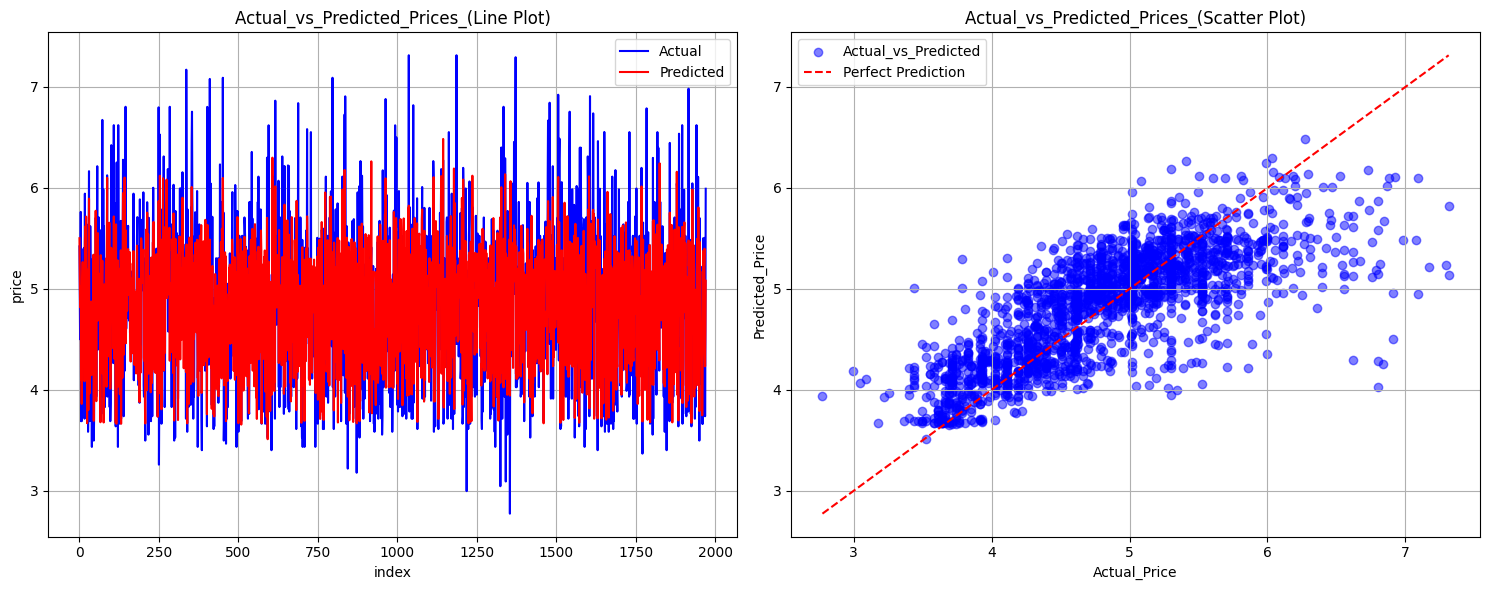

In [47]:
# Create_subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Line_plot
axes[0].plot(y_testing.values, color='blue', label='Actual')
axes[0].plot(y_predict, color='red', label='Predicted')
axes[0].set_xlabel('index')
axes[0].set_ylabel('price')
axes[0].set_title('Actual_vs_Predicted_Prices_(Line Plot)')
axes[0].legend()
axes[0].grid(True)

# Scatter_plot
axes[1].scatter(y_testing.values, y_predict, color='blue', label='Actual_vs_Predicted', alpha=0.5)
axes[1].plot([min(y_testing.values), max(y_testing.values)], [min(y_testing.values), max(y_testing.values)], color='red', linestyle='--', label='Perfect Prediction')
axes[1].set_xlabel('Actual_Price')
axes[1].set_ylabel('Predicted_Price')
axes[1].set_title('Actual_vs_Predicted_Prices_(Scatter Plot)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Support Vector Machine Regressor Using Scikit-Learn

SVR implementation through Scikit Learn provides efficient performance and is easy to implement. It allows programmers to designate certain parameters like kernel type, regularisation of parameters, and kernel coefficient.Epsilon, which is a parameter in support vector machine regressor. It determines a margin of relief where no retribution is given to errors.By using the kernel function, SVR to find out the data input attributes into a higher-dimensional space.

In [48]:
# Separate_features_(X)_and_target_variable_(y)
X = AirBnb_cleaned.drop(['price'], axis="columns")
y = AirBnb_cleaned['price']

In [49]:
# Split_the_data_into_training_and_testing_sets
X_training, X_testing, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Handle_missing_values_with_SimpleImputer
imputer = SimpleImputer(strategy="mean")  # Use mean value to fill missing values
X_training_imputed = imputer.fit_transform(X_training)
X_testing_imputed = imputer.transform(X_testing)

In [51]:
# Standardize_features
scaler = StandardScaler()
X_training_scaled = scaler.fit_transform(X_training_imputed)
X_testing_scaled = scaler.transform(X_testing_imputed)

In [52]:
# Initialize_and_fit_the_SVR_model
svr = SVR()  # Default parameters, you can adjust them as needed
model = svr.fit(X_training_scaled, y_training)

In [53]:
# Make_predictions
y_predict_ = model.predict(X_testing_scaled)

In [54]:
# Calculate_evaluation_metrics
mse = mean_squared_error(y_test, y_predict_)
r2 = r2_score(y_test, y_predict_)
mae = mean_absolute_error(y_test, y_predict_)
rmse = np.sqrt(mse)



In [55]:
# Print_the_metrics
print("Mean_Squared_Error (MSE):", mse)
print("R-squared_(R2):", r2)
print("Mean_Absolute_Error_(MAE):", mae)
print("Model Accuracy: {:.2f}%".format(r2*100))
print(f'Mean_Absolute_Error: ', mae)

Mean_Squared_Error (MSE): 0.2595128673141021
R-squared_(R2): 0.5557270002511223
Mean_Absolute_Error_(MAE): 0.36813635892963387
Model Accuracy: 55.57%
Mean_Absolute_Error:  0.36813635892963387


In [56]:
Error_USA_data = pd.DataFrame({
    'Actual Values': np.array(y_test).round(),
    'Predicted Values': y_predict_.round()
})
Error_USA_data.head(5)

,Actual Values,Predicted Values
0,4.0,4.0
1,5.0,4.0
2,7.0,5.0
3,7.0,5.0
4,4.0,4.0


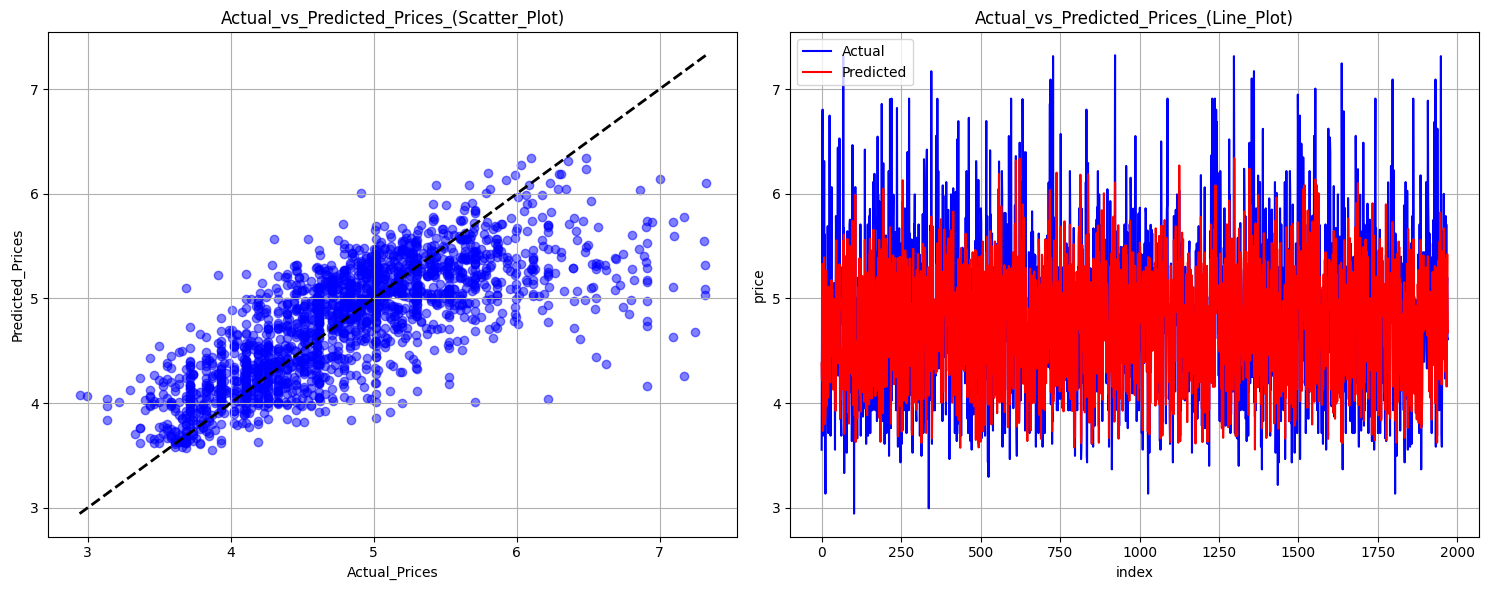

In [57]:
# Create_subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter_plot
axes[0].scatter(y_test, y_predict_, color='blue', alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual_Prices')
axes[0].set_ylabel('Predicted_Prices')
axes[0].set_title('Actual_vs_Predicted_Prices_(Scatter_Plot)')
axes[0].grid(True)

# Line_plot
axes[1].plot(y_test.values, color='blue', label='Actual')
axes[1].plot(y_predict_, color='red', label='Predicted')
axes[1].set_xlabel('index')
axes[1].set_ylabel('price')
axes[1].set_title('Actual_vs_Predicted_Prices_(Line_Plot)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Applying SVR Model using TensorFlow

TensorFlow is a powerful machine-learning library which is widely known for its Neural Network implementation. It offers powerful capabilities for implementing SVR models.Tensorflow provides great tonsillitis and flexibility in model customization as compared to scikit learn.Tensorflow instantly integrates with Neural network architecture. It could combine SVR with neural networks in TensorFlow to build hybrid models.

In [58]:
# Assuming_df1_is_preprocessed_appropriately
X = AirBnb_cleaned.drop(columns=['price']).values
y = AirBnb_cleaned['price'].values

In [59]:
# Split_the_dataset
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Scale_features
scaler = StandardScaler()
X_training_scaled = scaler.fit_transform(X_training)
X_testing_scaled = scaler.transform(X_testing)

In [61]:
# Define_the_SVR_model_using_TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_training_scaled.shape[1],)),  # Input_layer_with_shape_as_a_tuple
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden_layer_with_64_neurons_and_ReLU_activation
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden_layer_with_32_neurons_and_ReLU_activation
    tf.keras.layers.Dense(1, activation='linear')  # Output_layer_with_linear_activation_for_regression
])

In [62]:
# Compile_the_model_with_mean_squared_error_loss_and_mean_absolute_error_metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [63]:
# Train_the_model
history = model.fit(X_training_scaled, y_training, epochs=20, validation_split=0.2)

Epoch 1/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.3149 - mae: 2.8019 - val_loss: 0.7230 - val_mae: 0.6525
Epoch 2/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6475 - mae: 0.6124 - val_loss: 0.5152 - val_mae: 0.5504
Epoch 3/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4691 - mae: 0.5240 - val_loss: 0.4138 - val_mae: 0.4920
Epoch 4/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3859 - mae: 0.4752 - val_loss: 0.3637 - val_mae: 0.4607
Epoch 5/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3557 - mae: 0.4445 - val_loss: 0.3309 - val_mae: 0.4394
Epoch 6/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3100 - mae: 0.4164 - val_loss: 0.3169 - val_mae: 0.4217
Epoch 7/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3107 - mae: 0.4130 - val_loss: 0.3032 - val_mae: 0.4158
Epoch 8/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3017 - mae: 0.4106 - val_loss: 0.2899 - val_mae: 0.4091
Epoch 9/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - l

In [64]:
testing_loss, testing_mae = model.evaluate(X_testing_scaled, y_testing)
y_predict = model.predict(X_testing_scaled)
testing_rmse = np.sqrt(mean_squared_error(y_testing, y_predict))

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.2852 - mae: 0.3977
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [65]:
# Evaluate_the_model


r2 = r2_score(y_testing, y_predict)

print(f'Test_Loss: {testing_loss}')
print(f'Test_MAE: {testing_mae}')
print(f'R2_Score: {r2}')
print("Model Accuracy: {:.2f}%".format(r2*100))
print(f'Testing_RMSE: {testing_rmse}')

Test_Loss: 0.27397358417510986
Test_MAE: 0.3879999816417694
R2_Score: 0.5309709976295824
Model Accuracy: 53.10%
Testing_RMSE: 0.5234248497087182


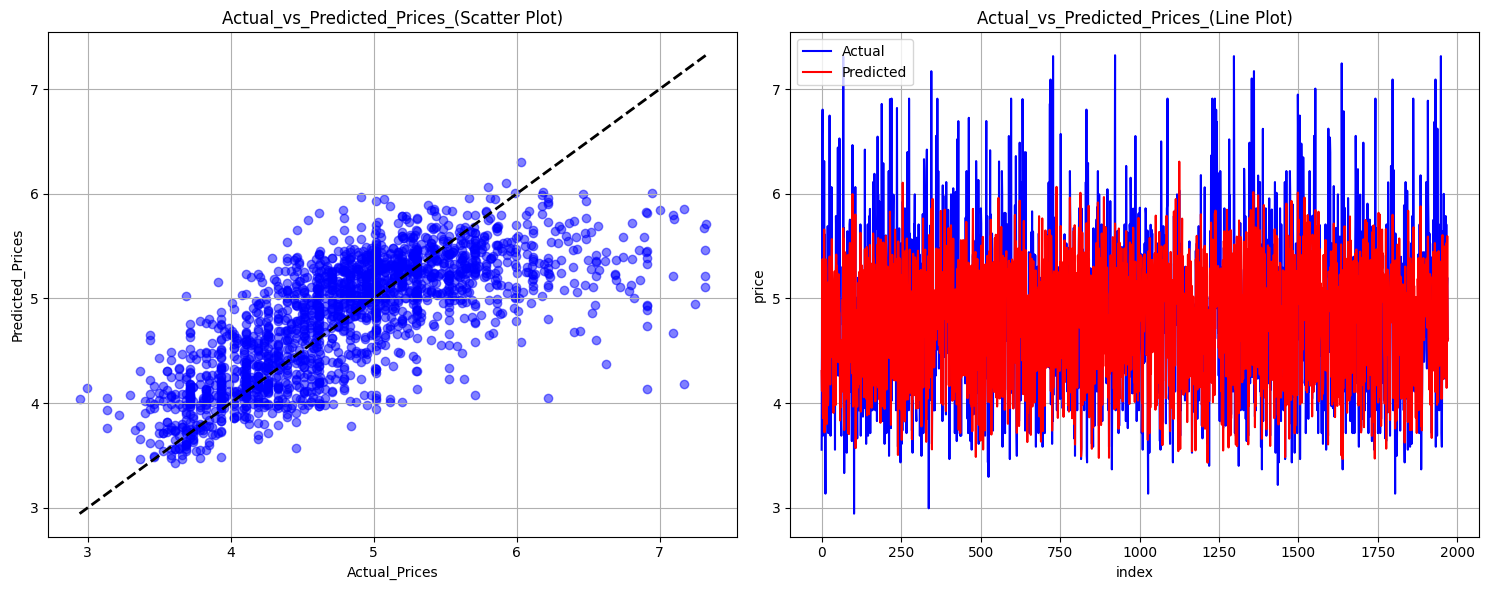

In [66]:
# Create_subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter_plot
axes[0].scatter(y_test, y_predict, color='blue', alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual_Prices')
axes[0].set_ylabel('Predicted_Prices')
axes[0].set_title('Actual_vs_Predicted_Prices_(Scatter Plot)')
axes[0].grid(True)

# Line_plot
axes[1].plot(y_testing, color='blue', label='Actual')
axes[1].plot(y_predict, color='red', label='Predicted')
axes[1].set_xlabel('index')
axes[1].set_ylabel('price')
axes[1].set_title('Actual_vs_Predicted_Prices_(Line Plot)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


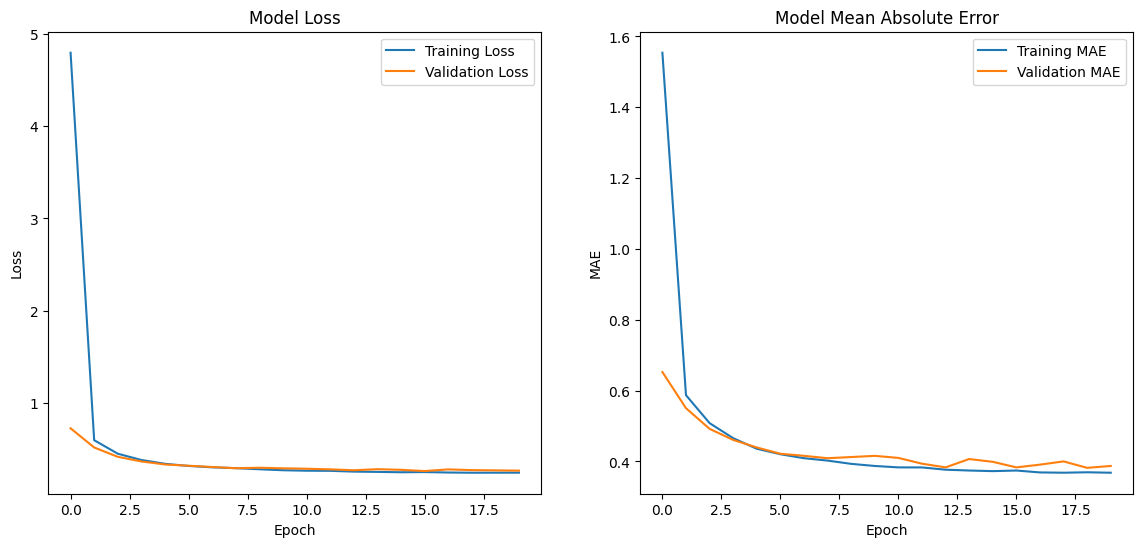

In [67]:
# Plot_training_&_validation_loss_values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot_training_&_validation_MAE_values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()
